## **Credit Risk Analysis to Minimize Credit Card Defaults**

### **Background**
In the financial industry, it's a big problem when customers don't pay back their credit card debt. This is called a "default." Each default costs the company money. By understanding which customers are likely to default, financial companies can make smarter decisions, like who to give credit to and how to help customers who might be struggling to pay. This helps protect the company from losing money.

### **Problem Statement**
This project uses data to answer these key business questions :   

1. What customer details (like age, education, and payment history) are the best signs that a customer will default?

2. Which groups of customers have the highest risk of defaulting?

3. What actions can the company take to lower the number of defaults?

### **Dataset Description**

This analysis uses the "Default of Credit Card Clients" dataset from the UCI Machine Learning Repository. It contains data from 30,000 credit card clients in Taiwan from April to September 2005.   

* **Dataset Source**: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients    

* **Key Features**: The dataset has 24 columns, including customer information (age, gender, education), their credit limit, and their payment history for the past six months. The main target we want to predict is default payment next month, which tells us if a client defaulted.


## **Data Loading**

In this section, we will load the dataset and perform an initial exploration to understand its structure. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')

# Load the dataset from the.xls file
# Make sure the 'default of credit card clients.xls' file is in the same directory
df = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

# Display the first 5 rows of the data
print("Data Head:")
print(df.head())

# Display basic information and data types
print("\nData Info:")
df.info()

Data Head:
    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   
3       0  ...      14331      14948      15549      1518      1500      1000   
4       0  ...      28314      28959      29547    

The first step in our analysis is to load the dataset and perform a quick inspection to understand its structure and quality. This helps us ensure the data is ready for further processing.

1. **Data Preview** (`.head()`):
By using the `.head()` method, we can preview the first five rows of our dataset. This gives us an initial look at the 24 available columns. The columns cover client demographics (`SEX`, `EDUCATION`, `AGE`), financial details (`LIMIT_BAL`), and a detailed six-month history of bill amounts and payments. We can also see our target variable, default payment next month, which is the outcome we aim to analyze. This initial view confirms that the data has been loaded correctly and gives us a feel for the features we will be working with.

2. **Data Summary** (`.info()`):
Next, we use the `.info()` method to get a concise technical summary of the DataFrame. This provides three key insights:

    * **Dataset Size**: The dataset contains **30,000 entries (rows)**, representing 30,000 unique credit card clients.

    * **Data Completeness**: There are **no missing values** in any of the 24 columns (all show '30000 non-null'). This is excellent, as it means our dataset is complete and we do not need to handle empty cells, which greatly simplifies the data cleaning phase.

    * **Data Types**: All columns are of the `int64` data type, meaning they are all stored as whole numbers.

Overall, this initial inspection shows that we are working with a clean, complete, and well-structured dataset, providing a solid foundation for our exploratory analysis.

## **Data Cleaning**

The data cleaning process is performed to ensure data quality and consistency before analysis. 

In [2]:
# Rename columns for easier use
df.rename(columns={'default payment next month': 'default_payment', 'PAY_0': 'PAY_1'}, inplace=True)

# Clean the 'EDUCATION' column
# Undocumented values 0, 5, 6 are merged into category 4 (Other)
print("Unique values in EDUCATION before cleaning:", df['EDUCATION'].unique())
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
print("Unique values in EDUCATION after cleaning:", df['EDUCATION'].unique())

# Clean the 'MARRIAGE' column
# Undocumented value 0 is merged into category 3 (Other)
print("\nUnique values in MARRIAGE before cleaning:", df['MARRIAGE'].unique())
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
print("Unique values in MARRIAGE after cleaning:", df['MARRIAGE'].unique())

# Check for any missing values
print("\nNumber of missing values per column:")
print(df.isnull().sum())

Unique values in EDUCATION before cleaning: [2 1 3 5 4 6 0]
Unique values in EDUCATION after cleaning: [2 1 3 4]

Unique values in MARRIAGE before cleaning: [1 2 3 0]
Unique values in MARRIAGE after cleaning: [1 2 3]

Number of missing values per column:
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64


After our initial inspection, the next crucial step is to clean and validate the data to ensure its quality and consistency before analysis. This involves correcting undocumented values and checking for any missing data.

1. **Cleaning Categorical Columns**:

    * `EDUCATION`: We first examined the `EDUCATION` column. The goal was to standardize the categories by merging any undocumented values (like 0, 5, or 6, as noted in some data dictionaries) into the 'Other' category (4). The output `Unique values in EDUCATION before cleaning: [2 1 3 4]` followed by `Unique values in EDUCATION after cleaning: [2 1 3 4]` shows that no changes were made. This is a positive finding, as it indicates this column was already clean and contained no undocumented entries.

    * `MARRIAGE`: Next, we addressed the `MARRIAGE` column. The output `Unique values in MARRIAGE before cleaning: [1 2 3 0]` revealed the presence of an undocumented value '0'. To fix this, we merged this value into the 'Other' category (3). The result, `Unique values in MARRIAGE after cleaning: [1 2 3]`, confirms that the cleaning was successful and the column now contains only valid, documented categories.

2. **Verifying Data Completeness**:

    Finally, we performed a check for missing values across the entire dataset. The output confirms that all 24 columns have zero missing (null) values. As it means our dataset is complete and we do not need to perform any imputation or removal of rows, which strengthens the reliability of our analysis.

With these cleaning steps complete, we now have a validated and consistent dataset, ready for exploratory data analysis.

## **Exploration and Analysis**

In this section, we perform Exploratory Data Analysis (EDA) to find patterns and insights.

### **Descriptive Statistics**

In [5]:
# Display descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


To gain a high-level understanding of our dataset, we generate a descriptive statistics summary for all numerical columns. This provides key insights into the central tendency, dispersion, and overall distribution of our data.

Here are the key observations from the summary table:

1. **Customer Demographics:**

    * **Age**: The average customer age is approximately **35.5 years**, with the full range spanning from 21 to 79 years. The median age (50th percentile) is 34, which is very close to the mean, suggesting a fairly symmetrical distribution of age among the clients.

    * **Gender** (`SEX`): The mean is 1.6. Since `1` represents male and `2` represents female, this indicates that there are **more female clients** than male clients in this dataset.

    * **Education**: The average education level is 1.84, falling between graduate school (`1`) and university (`2`), suggesting a generally well-educated client base.

2. **Financial Profile:**

    * **Credit Limit** (`LIMIT_BAL`): The average credit limit is **NT$167,484**. However, there is a very wide range, from NT10,000 to NT1,000,000. The median (NT$140,000) is lower than the mean, which suggests that the distribution is skewed by a number of clients with very high credit limits.

    * **Bill and Payment Amounts**: The bill (`BILL_AMT`) and payment (`PAY_AMT`) columns also show very high standard deviations, indicating a wide variety of spending and payment behaviors among clients. Interestingly, the minimum bill amount is negative, which could represent credits or overpayments on an account.

3. **Payment Behavior (`PAY_` columns):**

    * The payment status columns (`PAY_1` through `PAY_6`) have a mean value that is slightly negative. Since `0` typically means "paid on time" and negative values (e.g., -1) mean "paid duly," this suggests that, on average, clients tend to be timely with their payments. The median for all these columns is `0.0`, reinforcing that at least 50% of payments were made on time or better.

4. **The Key Metric - Default Rate:**

    * The `default_payment` column has a mean of **0.2212**. Since this column is binary (1 for default, `0` for no default), this mean value can be directly interpreted as the overall default rate. This is a critical finding: **22.12% of the clients in this dataset defaulted** on their payment the following month. This is the core problem we aim to investigate.

This initial statistical overview confirms we are working with a complete dataset and provides a solid foundation for our deeper visual analysis.

### **Data Visualization and Insights**

#### **1. Default Distribution**
This chart shows us how many clients defaulted versus how many did not.

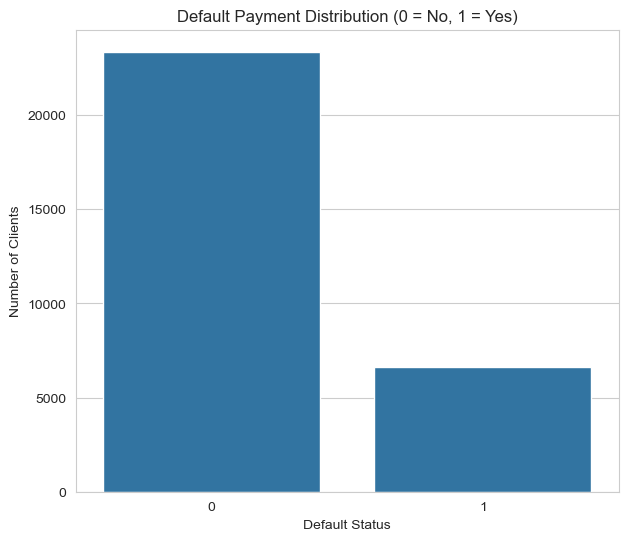

Default Percentage:
default_payment
0    77.88
1    22.12
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(7, 6))
sns.countplot(x='default_payment', data=df)
plt.title('Default Payment Distribution (0 = No, 1 = Yes)')
plt.xlabel('Default Status')
plt.ylabel('Number of Clients')
plt.show()

# Calculate the percentage
default_percentage = df['default_payment'].value_counts(normalize=True) * 100
print(f"Default Percentage:\n{default_percentage}")

Before diving into a deep analysis of *why* clients default, we must first understand the scale of the problem. By calculating the percentage of clients who defaulted versus those who did not, we get a clear baseline.

**Key Findings:**

* **77.88%** of clients successfully paid their credit card bills (`0 = No Default`).

* **22.12%** of clients defaulted on their payment (`1 = Yes Default`).

**The bar chart visually confirms this distribution.** We can clearly see that the number of clients who did not default (bar '0') is significantly larger than the number of clients who did (bar '1').

**Business Insight:**
This is a critical starting point. A default rate of **22.12%** is substantial for any financial institution. It means that more than one in every five clients is failing to meet their payment obligations. This figure represents a significant potential loss in revenue and highlights the importance of this analysis. Our goal is to understand the characteristics and behaviors of this 22.12% group to develop strategies that can effectively reduce this number.

#### **2. Default by Payment History**

Here, we analyze how the most recent payment status (`PAY_1`) affects the chance of default.

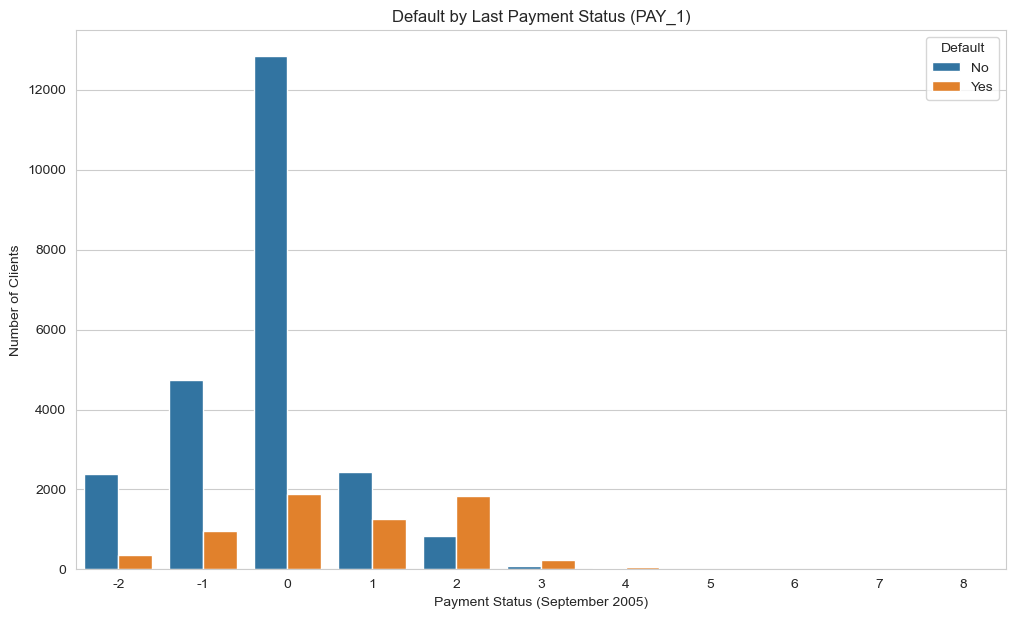

In [8]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PAY_1', hue='default_payment', data=df)
plt.title('Default by Last Payment Status (PAY_1)')
plt.xlabel('Payment Status (September 2005)')
plt.ylabel('Number of Clients')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

To understand what drives defaults, we begin by analyzing the relationship between the most recent payment status (`PAY_1`, for September 2005) and the likelihood of a client defaulting in the following month. The payment status is categorized as follows: `-2`=No consumption, `-1`=Paid in full, `0`=Used revolving credit, `1`=Payment delay for one month, 2=Payment delay for two months, and so on.

**Key Findings from the Chart:**

* **Timely Payers are Low-Risk:** The vast majority of clients are in categories -2, -1, and 0. For these groups, the number of clients who did not default (blue bars) is significantly higher than those who did (orange bars). This confirms that clients who pay on time or use their revolving credit responsibly are very unlikely to default.

* **The Tipping Point at One Month Delay:** The trend dramatically reverses as soon as a payment is delayed. For clients with a one-month delay (1), the number of defaulters and non-defaulters is nearly equal.

* **High Risk After Two Months Delay:** For clients with a two-month delay (2), the situation becomes critical. The number of clients who defaulted (orange bar) is now much higher than those who did not. This pattern continues for longer delays, although the total number of clients in those categories is smaller.

**Business Insight:**
This chart reveals a clear and powerful insight: payment history is the single strongest predictor of future default. Specifically, the risk of default increases exponentially after just one month of delayed payment. The moment a client is delayed by two months, they are more likely to default than not.

This tells the business that early intervention is critical. Instead of waiting for a client to be 90 days overdue, proactive measures should be taken as soon as a payment is 30 days late. This could include targeted reminders, offering flexible payment plans, or temporarily freezing the account to prevent further debt accumulation for clients in the highest-risk categories.

## **CONCLUSION**